# Machine Learning: Churn Analysis
by [Feliphe Galiza](https://github.com/felipheggaliza)

# Churn Analysis using Scikit-Learn

In this article our goal is to predict if a customer will churn or not based on past data. Furthermore, we will compute the probability of a given customer stop using the product.

![title](https://www.displayr.com/wp-content/uploads/2017/07/customer-churn-edit.jpeg)


### Importing tools

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

### Reading dataset

In [ ]:
DATASET_CSV = "https://cdn2.hubspot.net/hubfs/532045/Discriminant-analysis-churn-dataset.csv"

In [ ]:
df = pd.read_csv(DATASET_CSV)

### Exploratory Analysis
This step is very important for any Machine Learning or Deep Learning task. You have to look at your data in order to better understand it. The data may need some adjusts in order to improve the AI algorithm performance, sometimes preprocessing is also needed.

In [ ]:
df.head(10)

,account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,128,25,45.07,16.78,11.01,2.70,1,0
1,107,26,27.47,16.62,11.45,3.70,1,0
2,137,0,41.38,10.30,7.32,3.29,0,0
3,84,0,50.90,5.26,8.86,1.78,2,0
4,75,0,28.34,12.61,8.41,2.73,3,0
5,118,0,37.98,18.75,9.18,1.70,0,0
6,121,24,37.09,29.62,9.57,2.03,3,0
7,147,0,26.69,8.76,9.53,1.92,0,0
8,117,0,31.37,29.89,9.71,2.35,1,0
9,141,37,43.96,18.87,14.69,3.02,0,0


In [ ]:
print("Number of rows: ", df.shape[0])

Number of rows:  5000


### Do we have any problems with our dataset?

In [ ]:
df.describe().loc['count']

account_length                   5000.0
number_vmail_messages            5000.0
total_day_charge                 5000.0
total_eve_charge                 5000.0
total_night_charge               5000.0
total_intl_charge                5000.0
number_customer_service_calls    5000.0
churn                            5000.0
Name: count, dtype: float64

### Features Correlation Matrix


In [ ]:
df.corr()

,account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.014575,-0.001019,-0.009587,0.000656,0.001292,-0.001445,0.021203
number_vmail_messages,-0.014575,1.000000,0.005377,0.019496,0.005535,0.002505,-0.007086,-0.097633
total_day_charge,-0.001019,0.005377,1.000000,-0.010757,0.011785,-0.019419,0.002726,0.207700
total_eve_charge,-0.009587,0.019496,-0.010757,1.000000,-0.016652,0.000155,-0.013836,0.089282
total_night_charge,0.000656,0.005535,0.011785,-0.016652,1.000000,-0.006650,-0.008530,0.045673
total_intl_charge,0.001292,0.002505,-0.019419,0.000155,-0.006650,1.000000,-0.012180,0.063275
number_customer_service_calls,-0.001445,-0.007086,0.002726,-0.013836,-0.008530,-0.012180,1.000000,0.212564
churn,0.021203,-0.097633,0.207700,0.089282,0.045673,0.063275,0.212564,1.000000


## Preprocessing

## Dropping target column from features and train test split

In [ ]:
features = df.drop(["churn"], axis=1).columns

In [ ]:
print(features)

Index(['account_length', 'number_vmail_messages', 'total_day_charge',
       'total_eve_charge', 'total_night_charge', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [ ]:
print("Train set has {} examples and {} features".format(df_train.shape[0],df_train.shape[1]))
print("Test set has {} examples and {} features".format(df_test.shape[0],df_train.shape[1]))

Train set has 3750 examples and 8 features
Test set has 1250 examples and 8 features


## Training and evaluation

In [ ]:
def train_classifier(clf, features, train_targets):
    clf.fit(features, train_targets)
    return clf

In [ ]:
def make_predictions(clf, features):
    predictions = clf.predict(features)
    probs = clf.predict_proba(features)
    return predictions, probs

In [ ]:
def evaluate_clf(clf,features, test_targets):
    score = clf.score(features, test_targets)
    return score

In [ ]:
def get_confusion_matrix(test_targets, predictions):
    conf_matrix = pd.DataFrame(
        confusion_matrix(test_targets, predictions), 
        columns=["Predicted False", "Predicted True"], 
        index=["Actual False", "Actual True"]
    )
    return conf_matrix

In [ ]:
def plot_roc_curve(targets_test,probs):
    fpr, tpr, threshold = roc_curve(targets_test, probs[:,1])
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def plot_features_importance(clf):
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(clf.feature_importances_))
    bar_width = 0.5
    rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.show()

# Setting number of CPUs in Scikit-Learn

In order to better understand how to get the most out of your Intel CPU it is also important look at the documentation of the library you are using and set some flags that might be important to get best performance.

Special attention for n_jobs :

   - KNN: The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores.
   - Random Forest: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores. (default=1)

# Training Classifiers

He we are going to evaluate 3 different Classification Algorithms:

- K-Nearest Neighboors (KNN)
- Random Forest
- Support Vector Machines (SVM)


In [ ]:
knnClf = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knnClf = train_classifier(knnClf, df_train[features], df_train["churn"] )

In [ ]:
randForestClf = RandomForestClassifier(n_estimators=30, n_jobs=-1)
randForestClf = train_classifier(randForestClf, df_train[features], df_train["churn"] )

In [ ]:
svmClf =SVC(kernel='rbf', random_state=0, gamma=.01, C=1, probability=True)
svmClf = train_classifier(svmClf, df_train[features], df_train["churn"] )

In [ ]:
mlpClf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1e-5,
                       hidden_layer_sizes=(10, 15, 10), random_state=1)
mlpClf = train_classifier(mlpClf, df_train[features], df_train["churn"] )

## Performing some predictions

In [ ]:
knnPreds, knnProbs = make_predictions(knnClf, df_test[features])
randForestPreds, randForestProbs = make_predictions(randForestClf, df_test[features])
svmPreds, svmProbs = make_predictions(svmClf, df_test[features])
mlpPreds, mlpProbs = make_predictions(mlpClf, df_test[features])

In [ ]:
print("knnPreds {} \n".format(knnPreds[0:10]))
print("randForestPreds {} \n".format(randForestPreds[0:10]))
print("svmPreds {} \n".format(svmPreds[0:10]))
print("mlpPreds {} \n".format(mlpPreds[0:10]))
print("Truth {} \n".format(df_train["churn"].tolist()[0:10]))

knnPreds [0 0 0 0 0 0 0 0 1 0] 

randForestPreds [0 0 0 0 0 0 0 0 1 0] 

svmPreds [0 0 0 0 0 0 0 0 1 0] 

mlpPreds [0 0 0 0 0 0 0 0 0 0] 

Truth [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 



## Evaluating Classifiers 

In [ ]:
knnEval = evaluate_clf(knnClf, df_test[features], df_test["churn"])
randForestEval = evaluate_clf(randForestClf, df_test[features], df_test["churn"])
svmEval = evaluate_clf(svmClf, df_test[features], df_test["churn"])
mlpEval = evaluate_clf(mlpClf, df_test[features], df_test["churn"])


In [ ]:
print("knnEval {}".format(knnEval))
print("randForestEval {}".format(randForestEval))
print("svmEval {}".format(svmEval))
print("mlpEval {}".format(mlpEval))

knnEval 0.8848
randForestEval 0.9256
svmEval 0.8912
mlpEval 0.8488


### F1-Score


In [ ]:
print("KNN F1-Score: {}".format(f1_score(df_test["churn"], knnClf.predict(df_test[features]))))
print("Random Forest F1-Score: {}".format(f1_score(df_test["churn"], randForestClf.predict(df_test[features]))))
print("SVM F1-Score: {}".format(f1_score(df_test["churn"], svmClf.predict(df_test[features]))))
print("MLP F1-Score: {}".format(f1_score(df_test["churn"], mlpClf.predict(df_test[features]))))

KNN F1-Score: 0.4049586776859504
Random Forest F1-Score: 0.6950819672131148
SVM F1-Score: 0.4687499999999999
MLP F1-Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### ROC AUC Score


In [ ]:

print("KNN ROC AUC Score: {}".format(roc_auc_score(df_test["churn"], knnClf.predict(df_test[features]))))
print("Random Forest ROC AUC Score: {}".format(roc_auc_score(df_test["churn"], randForestClf.predict(df_test[features]))))
print("SVM ROC AUC Score: {}".format(roc_auc_score(df_test["churn"], svmClf.predict(df_test[features]))))
print("MLP ROC AUC Score: {}".format(roc_auc_score(df_test["churn"], mlpClf.predict(df_test[features]))))

KNN ROC AUC Score: 0.6277446154920235
Random Forest ROC AUC Score: 0.7757107450792654
SVM ROC AUC Score: 0.6554313839893482
MLP ROC AUC Score: 0.5


### Confusion Matrix

In [ ]:
confMatKNN = get_confusion_matrix(df_test["churn"], knnPreds)
print(confMatKNN)

              Predicted False  Predicted True
Actual False             1057               4
Actual True               140              49


In [ ]:
confMatrandForest = get_confusion_matrix(df_test["churn"], randForestPreds)
print(confMatrandForest)

              Predicted False  Predicted True
Actual False             1051              10
Actual True                83             106


In [ ]:
confMatSVM= get_confusion_matrix(df_test["churn"], svmPreds)
print(confMatSVM)

              Predicted False  Predicted True
Actual False             1054               7
Actual True               129              60


In [ ]:
confMatMLP= get_confusion_matrix(df_test["churn"], mlpPreds)
print(confMatMLP)

              Predicted False  Predicted True
Actual False             1061               0
Actual True               189               0


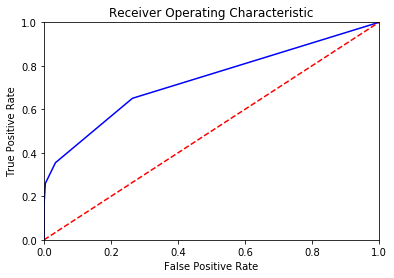

In [ ]:
plot_roc_curve(df_test["churn"], knnProbs)

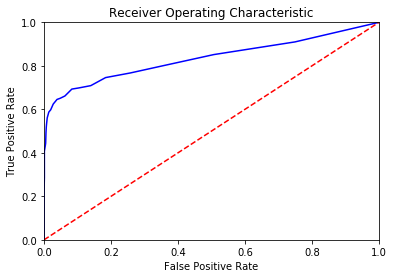

In [ ]:
plot_roc_curve(df_test["churn"], randForestProbs)

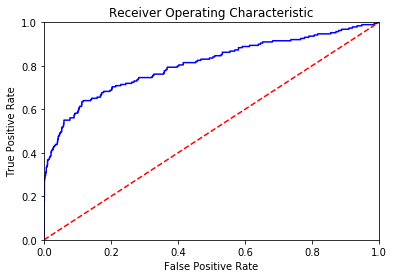

In [ ]:
plot_roc_curve(df_test["churn"], svmProbs)

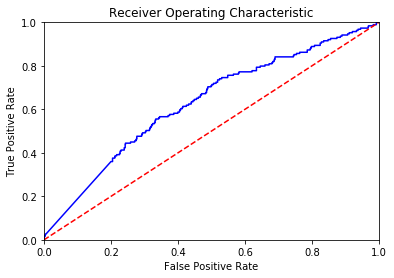

In [ ]:
plot_roc_curve(df_test["churn"], mlpProbs)

,importance,labels
2,0.324266,total_day_charge
3,0.174134,total_eve_charge
6,0.133962,number_customer_service_calls
4,0.116688,total_night_charge
5,0.098769,total_intl_charge


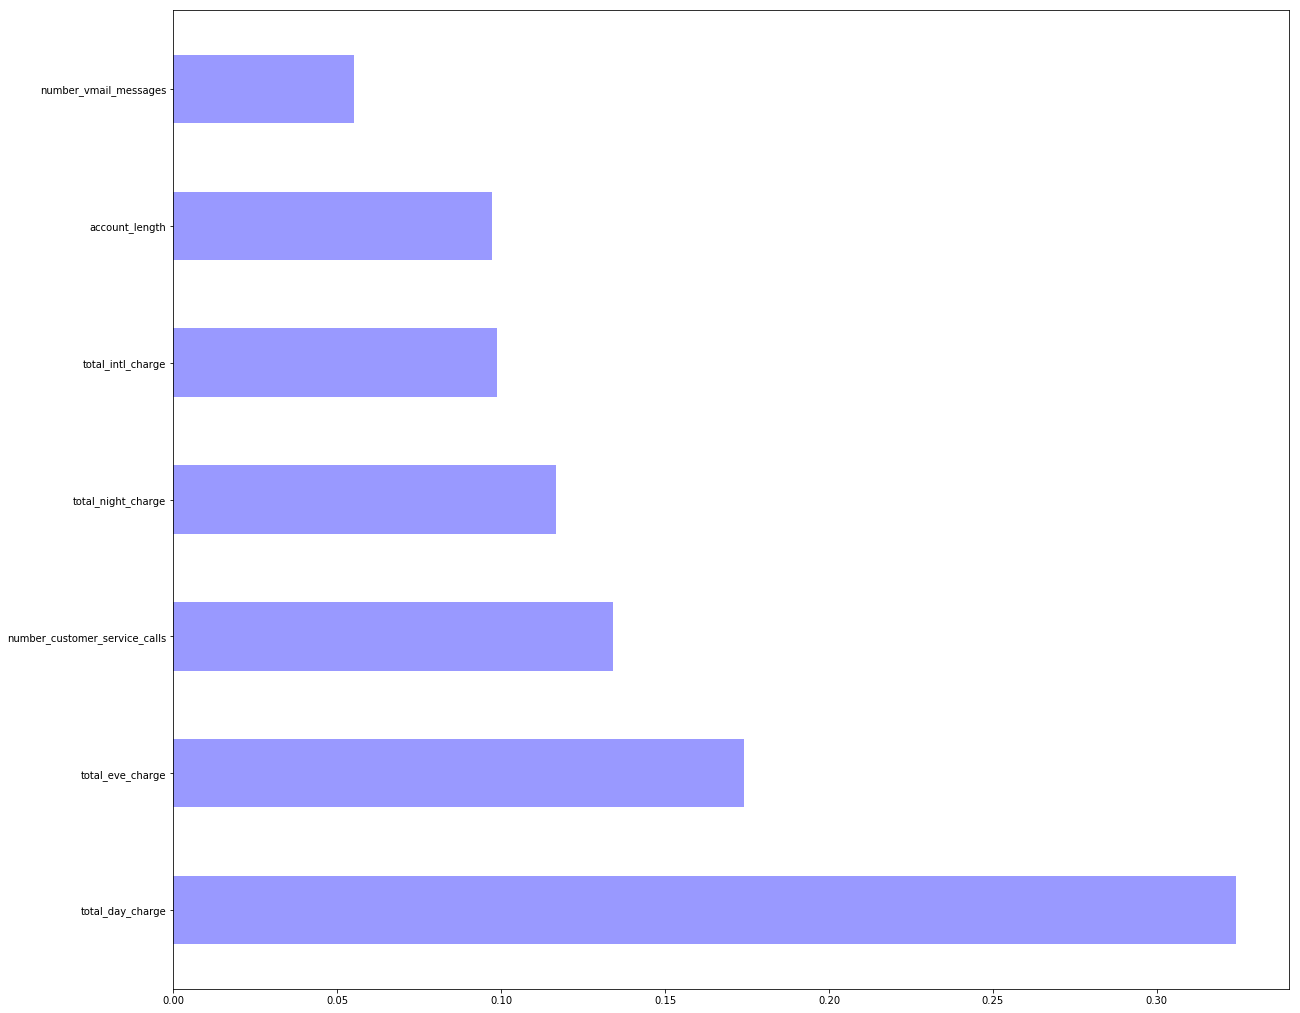

In [ ]:
plot_features_importance(randForestClf)

### How many customers have more than 90% chance of stop using my product?

In [ ]:
df_test["prob_true"] = randForestProbs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
df_risky[["prob_true"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
894,1.000000
1593,0.966667
349,1.000000
3686,0.966667
3373,0.933333
1691,0.933333
76,0.966667
2388,0.966667
4264,0.966667
3901,0.966667


In [ ]:
df_risky.shape

(19, 9)

In [ ]:
df.iloc[365]

account_length                   154.00
number_vmail_messages              0.00
total_day_charge                  59.64
total_eve_charge                  18.40
total_night_charge                11.43
total_intl_charge                  2.73
number_customer_service_calls      1.00
churn                              1.00
Name: 365, dtype: float64